# Regression using Decision Trees Lab

### Intro and objectives


### In this lab you will learn:
1. a basic example of decision tree training for regression purposes .

### What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

### In this lab we will implement regression using decision trees

## Let's create some synthetic data

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

In [14]:
X_quad[0:5]

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136]])

In [7]:
y_quad[0:5]

array([[-0.00126044],
       [ 0.20894973],
       [ 0.061148  ],
       [-0.00812529],
       [ 0.16496754]])

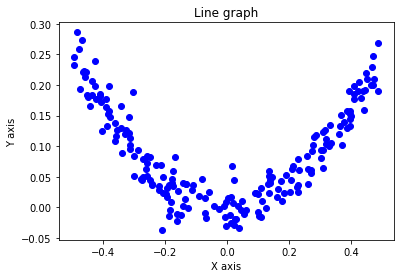

In [22]:
# plotting
import matplotlib.pyplot as plt

plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.scatter(X_quad, y_quad, color ="blue")
plt.show()

## Let's train a decision tree regressor (Max Depth=2)

In [43]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)


DecisionTreeRegressor(max_depth=2, random_state=42)

## Let's visualize the decision tree classifier

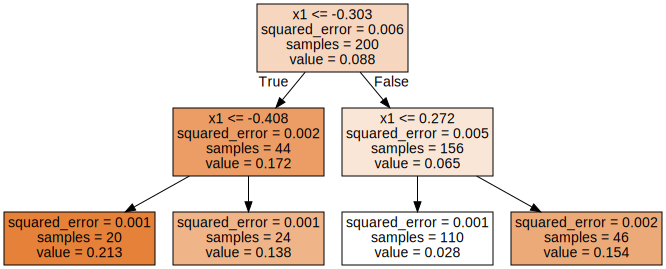

In [44]:
from sklearn.tree import export_graphviz
import graphviz




dot_data = export_graphviz(tree_reg, out_file=None, 
                                feature_names=["x1"],  
                                
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

## Let's train a second decision tree regressor (Max Depth=10)


In [45]:
tree_reg2 = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=10, random_state=42)

## Let's visualize the boundaries of the two decision trees:

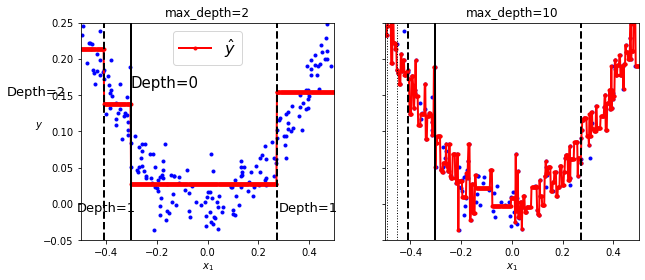

In [48]:
# extra code – this cell generates and saves Figure 6–5

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=10")


plt.show()

#### The second model is clearly overfitting the training data. We can impose some regularization to improve its performance

## Let's train a regularized decision tree regressor (max_depth=10,min_samples_leaf=10)

In [50]:
tree_reg3 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10,max_depth=10)
tree_reg3.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42)

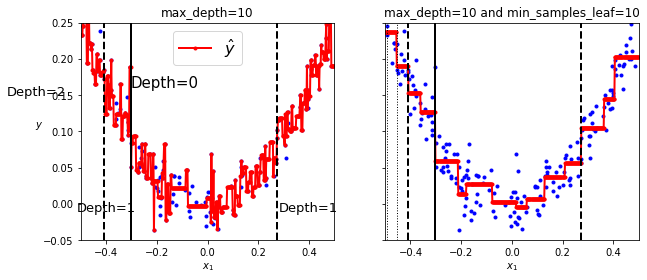

In [52]:
# extra code – this cell generates and saves Figure 6–5

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg2, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=10")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg3, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=10 and min_samples_leaf=10")


plt.show()

#### We observe from the previous figures that while the first one overfits the data the second model avoids overfitting thanks to regularization (min_samples_leaf)